# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hojo, Hiroshi \
_Student No._: 202201830 \
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Hiroshi Madrigal Hojo (SGD.)

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[95]**/100

Score breakdown:
* Problem 1 - [25]/30
* Problem 2 - [70]/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


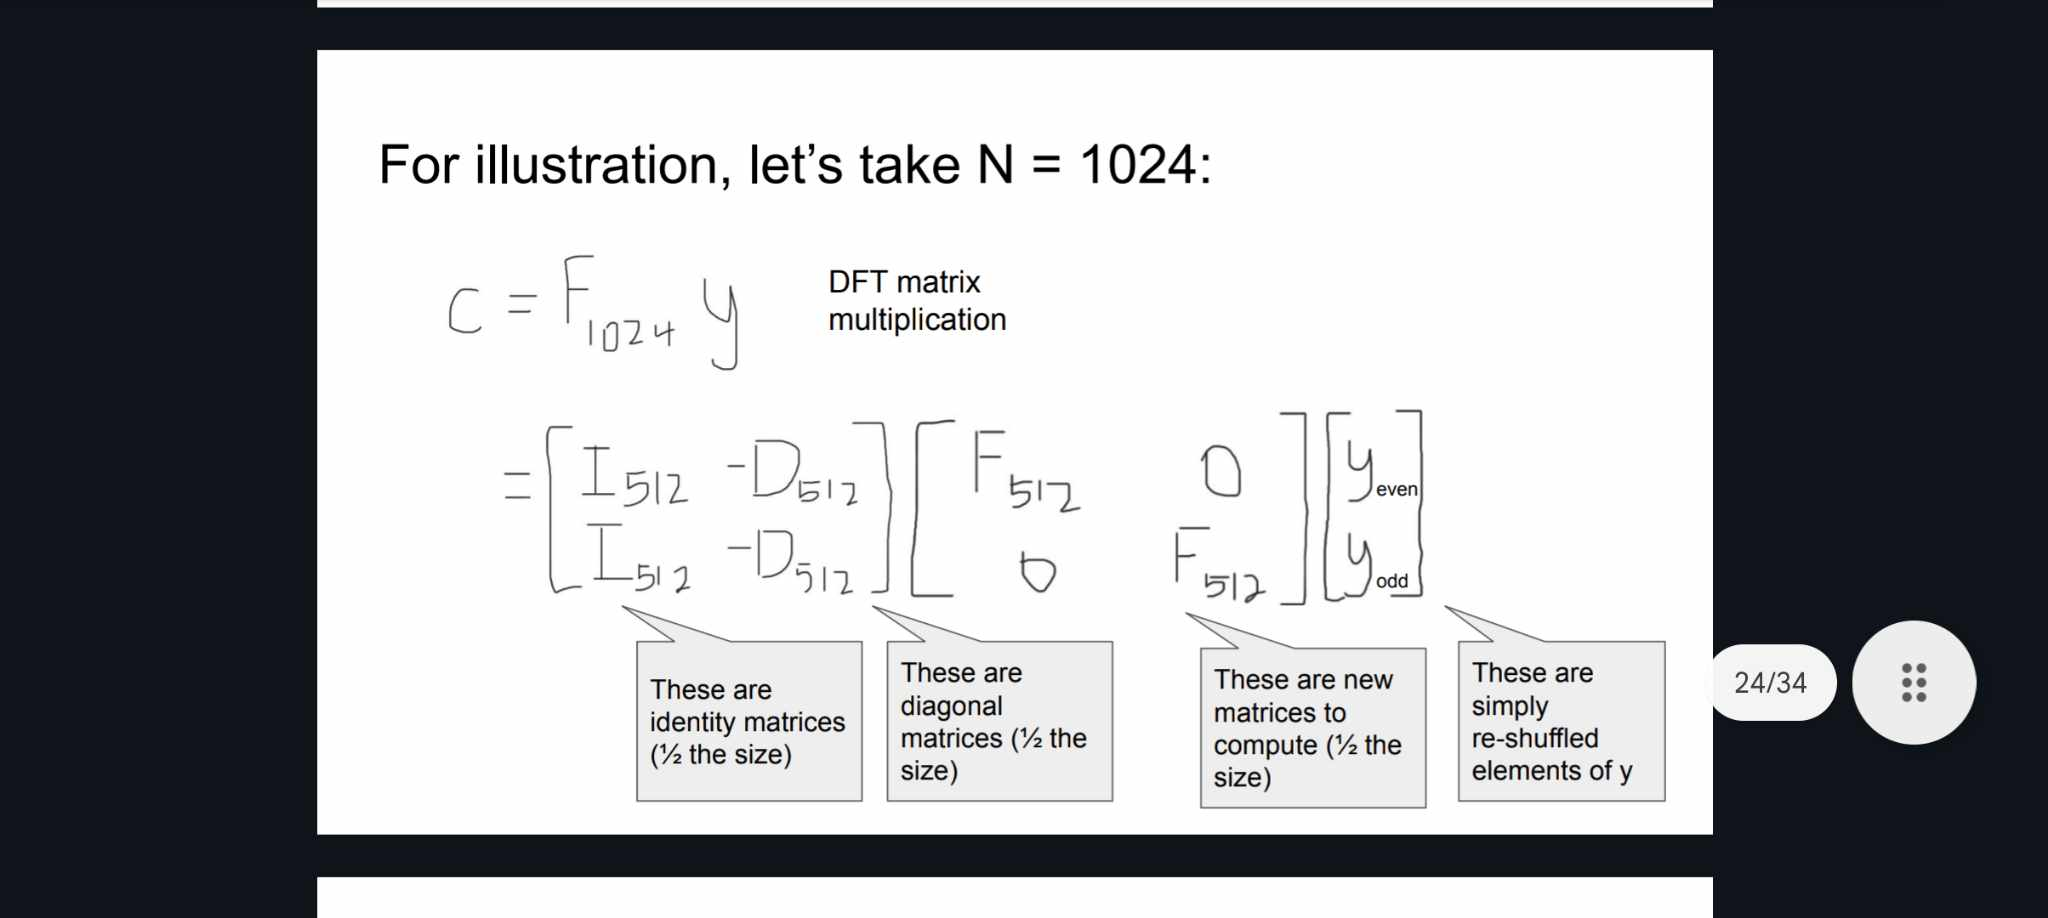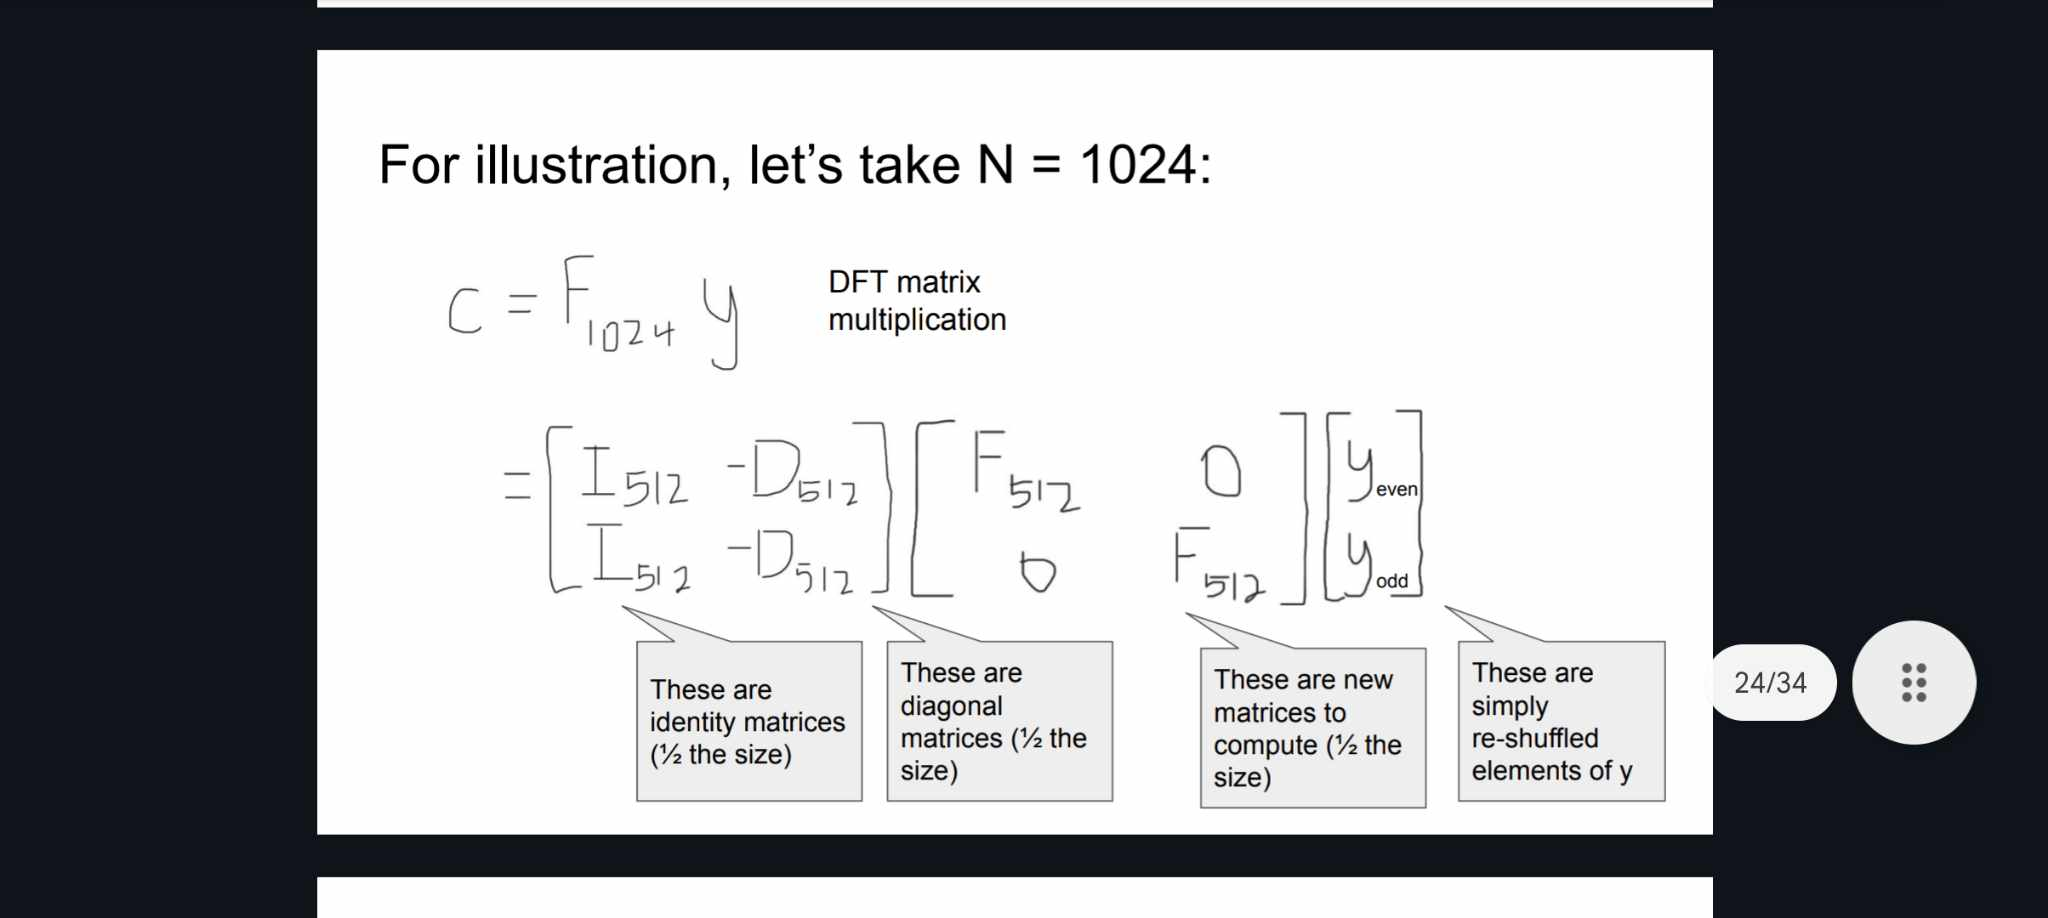


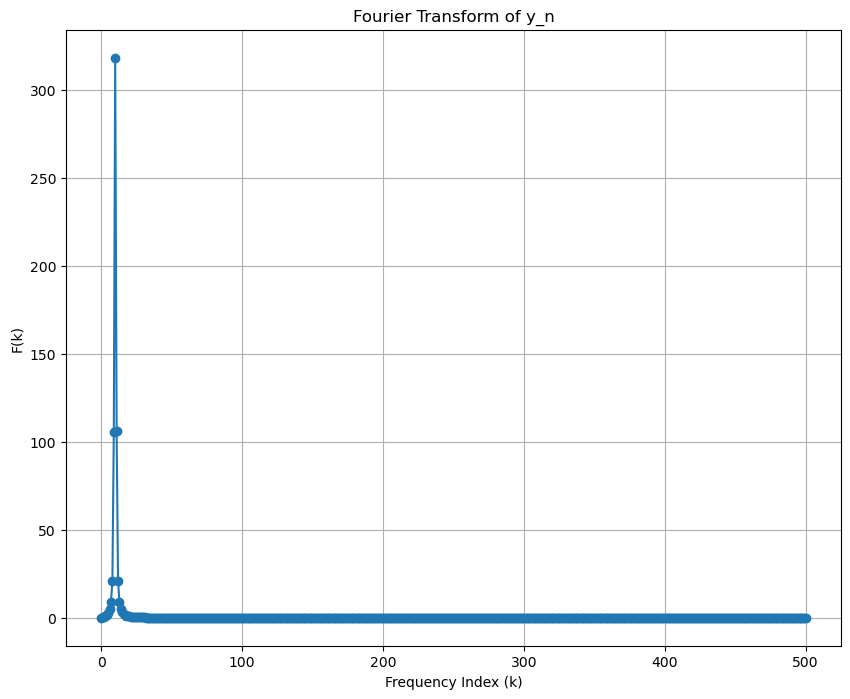

In [12]:
#Import necessary libraries
from numpy import zeros  #Used to create arrays of zeros
from cmath import exp, pi  #Importing complex exponential and pi for Fourier transform calculations
import matplotlib.pyplot as plt

#Define the Discrete Fourier Transform (DFT) function
def dft(y):
    N = len(y)  #Length of the input signal
    c = zeros(N//2 + 1, complex)  #Allocate array for DFT coefficients (complex numbers)
    #Only need to calculate coefficients up to N//2 for real signals (Nyquist limit)
    for k in range(N//2 + 1):  #Loop over each frequency index k (up to N//2)
        for n in range(N):  #Loop over each time sample n
            #Compute the k-th Fourier coefficient by summing over all time samples
            c[k] += y[n] * exp(-2j * pi * k * n / N)  #Exponent term for DFT
    return c  #Return the array of DFT coefficients

#Import numpy for generating data
import numpy as np

#Define the number of samples
N = 1000
#Generate a range of sample indices from 0 to N-1
n = np.arange(N)

#Define the input signal y: a modulated sine wave
#y = sin(pi * n / N) * sin(20 * pi * n / N)
#This is a product of two sine waves, one with frequency pi/N and the other with frequency 20pi/N
y = np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N)

#Calculate the DFT coefficients for the signal y
c = dft(y)

#Calculate the magnitudes of the DFT coefficients
magnitudes = np.abs(c)  # The magnitudes represent the strength of each frequency component

# Generate frequency indices (k-values) corresponding to each DFT coefficient
frequencies = np.arange(len(c))

# Plotting the DFT results
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
plt.plot(frequencies, magnitudes, marker='o', linestyle='-')  # Plot frequencies vs magnitudes
plt.title('Fourier Transform of y_n')  # Title of the plot
plt.xlabel('Frequency Index (k)')  # Label for the x-axis
plt.ylabel('F(k)')  # Label for the y-axis (Fourier coefficient magnitudes)
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot


### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [10]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [11]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

print(dow[0:10])

[12121.71 12136.44 12226.73 12221.93 12194.13 12283.85 12331.6  12309.25
 12278.41 12307.48]


Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [12]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

[12121.71 12136.44 12226.73 ... 11499.25 11491.91 11478.13]


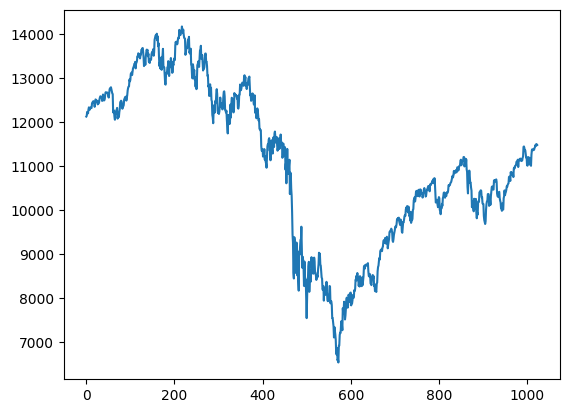

In [13]:
import matplotlib.pyplot as plt
import numpy as np

d = dow
print(d)
plt.plot(d)
plt.show()

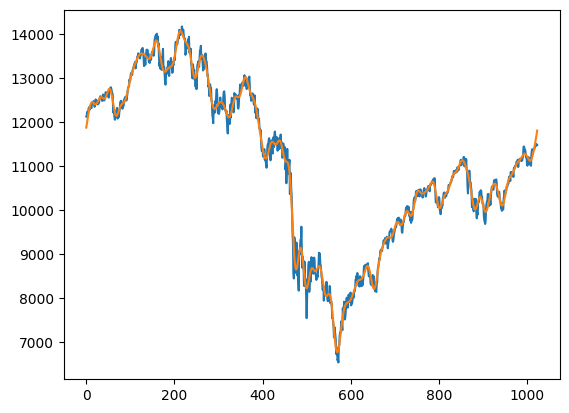

In [15]:
from numpy.fft import rfft, irfft
import numpy as np

c = rfft(d)

# Select the middle portion of the DFT coefficients (indices 51 to 512) and set them to zero.
# These coefficients represent frequencies from index 51 to 512, which are being suppressed (set to 0).
newc = c[51:513] * 0  # Zero out the frequency components from index 51 to 512.

# Select the lower portion of the DFT coefficients (up to 10% of the total length).
# These are the low-frequency components of the signal.
newc2 = c[0:round(0.1 * len(c))]  # Keep the first 10% of the DFT coefficients.

# Concatenate the lower-frequency components (newc2) with the zeroed-out middle frequencies (newc).
# This creates a new set of DFT coefficients where only the lower frequencies are preserved,
# and the higher frequencies have been zeroed out.
newc2 = np.concatenate([newc2, newc])


z = irfft(newc2)

plt.plot(d)
plt.plot(z)
plt.show()

The orange curve represents the reconstructed signal from only the first 10% of the DFT coefficients (low-frequency components), while the blue curve represents the original signal. Changing this percentage affects the result in various ways.

For using 10% of the array, the orange line appears smoother than the original blue curve. This happens because only the low-frequency components are retained, effectively filtering out the high-frequency components (rapid fluctuations). Low-frequency components represent the overall trend, while high-frequency components capture more detailed, short-term variations. More rapid changes or oscillations in the original signal are lost. This is because high-frequency components are responsible for capturing fine details in the signal, and their absence results in a smoothed version of the original signal.

If we use more than 10%, the orange graph will have better preservation of details. As you include more DFT coefficients (frequencies), higher-frequency components are gradually reintroduced, allowing for a more detailed reconstruction of the signal. The reconstructed signal will start to resemble the original signal more closely, preserving both the trend and finer details.

If we use less than 10%, we will observe increased smoothing. If fewer DFT coefficients are used, the signal will become even smoother, and more detailed variations will be lost.

The choice of how many coefficients to retain depends on how much detail you need versus how much noise or fine fluctuations you want to filter out.


### Instructor's Comments

#### Problem 1
- There should be two peaks. Your choice of `N` is such that only half of the period of the envelope is sampled.